# k-Means


根据训练样本中是否包含标签信息，机器学习可以分为 **监督学习** 和 **无监督学习**。`聚类算法`是典型的无监督学习，其训练的样本中值包含`样本的特征`，**不包含样本的标签信息**。在聚类算法中，利用样本的特征，将具有相似特征空间分布的样本划分到同一类别中。


![cluster illustration](images/kmeans-illustration.jpeg)

## 1. 方法

***k-Means算法是一个重复移动类中心点（重心，centroids）的过程***， 最经典的聚类方法，具有出色的速度和通用性:
* 移动中心点到其包含成员的平均位置;
* 然后重新划分其内部成员。

`k`是算法中的超参数，表示类的数量；k-Means可以自动分配样本到不同的类，但是不能决定究竟要分几个类。`k`必须是一个比训练集样本数小的正整数。有时，类的数量是由问题内容指定的。例如，一个鞋厂有三种新款式，它想知道每种新款式都有哪些潜在客户，于是它调研客户，然后从数据里找出三类。也有一些问题没有指定聚类的数量，最优的聚类数量是不确定的。

k-Means的参数是类的重心位置和其内部观测值的位置，与广义线性模型和决策树类似，k-Means参数的最优解也是以代价函数最小化为目标。k-Means代价函数公式如下：
$$
J = \sum_{k=1}^{K} \sum_{i \in C_k} | x_i - u_k|^2
$$

$u_k$是第$k$个类的重心位置，定义为：
$$
u_k = \frac{1}{|C_k|} \sum_{i \in C_k} x_i
$$


成本函数是各个类畸变程度（distortions）之和。每个类的畸变程度等于该类重心与其内部成员位置距离的平方和。若类内部的成员彼此间越紧凑则类的畸变程度越小，反之，若类内部的成员彼此间越分散则类的畸变程度越大。

## 2. 算法
求解成本函数最小化的参数就是一个重复配置每个类包含的观测值，并不断移动类重心的过程。

输入：$T=\{ x_1, x_2, ..., x_N\}$，其中$x_i \in \mathbb{R}^D$，i=1,2...N

输出：聚类集合$C_k$, 聚类中心$u_k$, 其中k=1,2,...K

处理过程：
1. 初始化类的重心$u_k$，可以随机选择样本作为聚类中心
2. 每次迭代的时候，把所有样本分配到离它们最近的类，即更新聚类集合$C_k$
3. 然后把重心移动到该类全部成员位置的平均值那里，即更新$u_k$
4. 若达到最大迭代步数，或两次迭代差小于设定的阈值则算法结束，否则重复步骤2



## 3. 计算过程演示

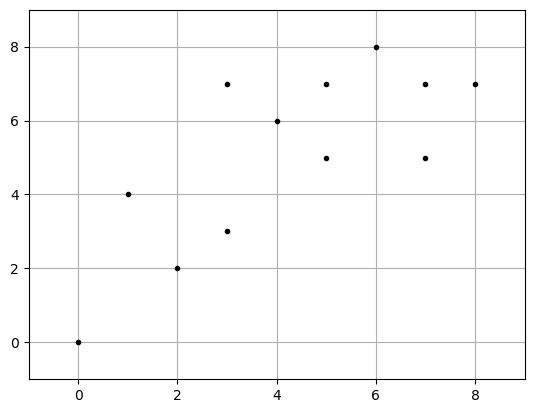

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X0 = np.array([7, 5, 7, 3, 4, 1, 0, 2, 8, 6, 5, 3])
X1 = np.array([5, 7, 7, 3, 6, 4, 0, 2, 7, 8, 5, 7])
plt.figure()
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0, X1, 'k.');
plt.show()

假设K-Means初始化时，将第一个类的重心设置在第5个样本，第二个类的重心设置在第11个样本.那么我们可以把每个实例与两个重心的距离都计算出来，将其分配到最近的类里面。计算结果如下表所示：
![data_0](images/data_0.png)

新的重心位置和初始聚类结果如下图所示。第一类用X表示，第二类用点表示。重心位置用稍大的点突出显示。




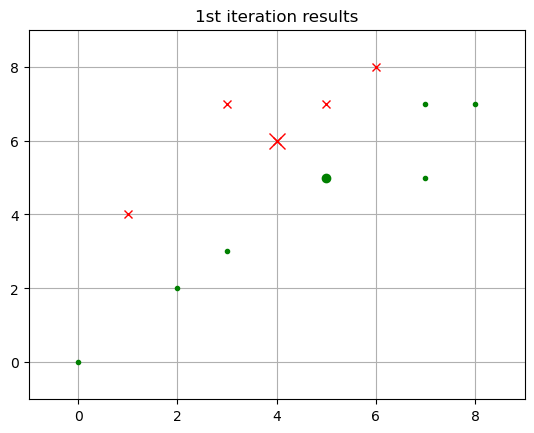

In [2]:
C1 = [1, 4, 5, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('1st iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(4,6,'rx',ms=12.0)
plt.plot(5,5,'g.',ms=12.0);
plt.show()

现在我们重新计算两个类的重心，把重心移动到新位置，并重新计算各个样本与新重心的距离，并根据距离远近为样本重新归类。结果如下表所示：

![data_1](images/data_1.png)

画图结果如下：

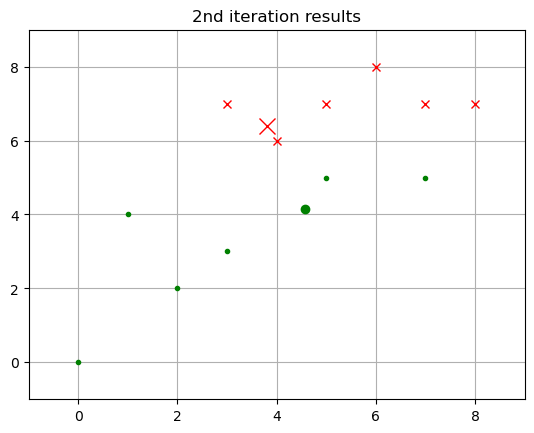

In [3]:
C1 = [1, 2, 4, 8, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('2nd iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(3.8,6.4,'rx',ms=12.0)
plt.plot(4.57,4.14,'g.',ms=12.0);
plt.show()

我们再重复一次上面的做法，把重心移动到新位置，并重新计算各个样本与新重心的距离，并根据距离远近为样本重新归类。结果如下表所示：
![data_2](images/data_2.png)

画图结果如下：


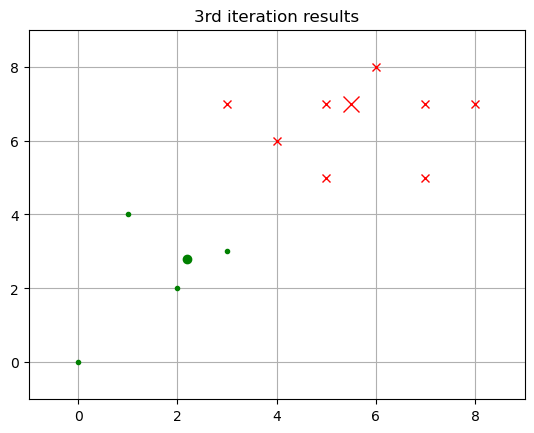

In [4]:
C1 = [0, 1, 2, 4, 8, 9, 10, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('3rd iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(5.5,7.0,'rx',ms=12.0)
plt.plot(2.2,2.8,'g.',ms=12.0);
plt.show()

再重复上面的方法就会发现类的重心不变了，k-Means会在条件满足的时候停止重复聚类过程。通常，条件是前后两次迭代的成本函数值的差达到了限定值，或者是前后两次迭代的重心位置变化达到了限定值。如果这些停止条件足够小，k-Means就能找到最优解，不过这个最优解不一定是全局最优解。



## 4. Program

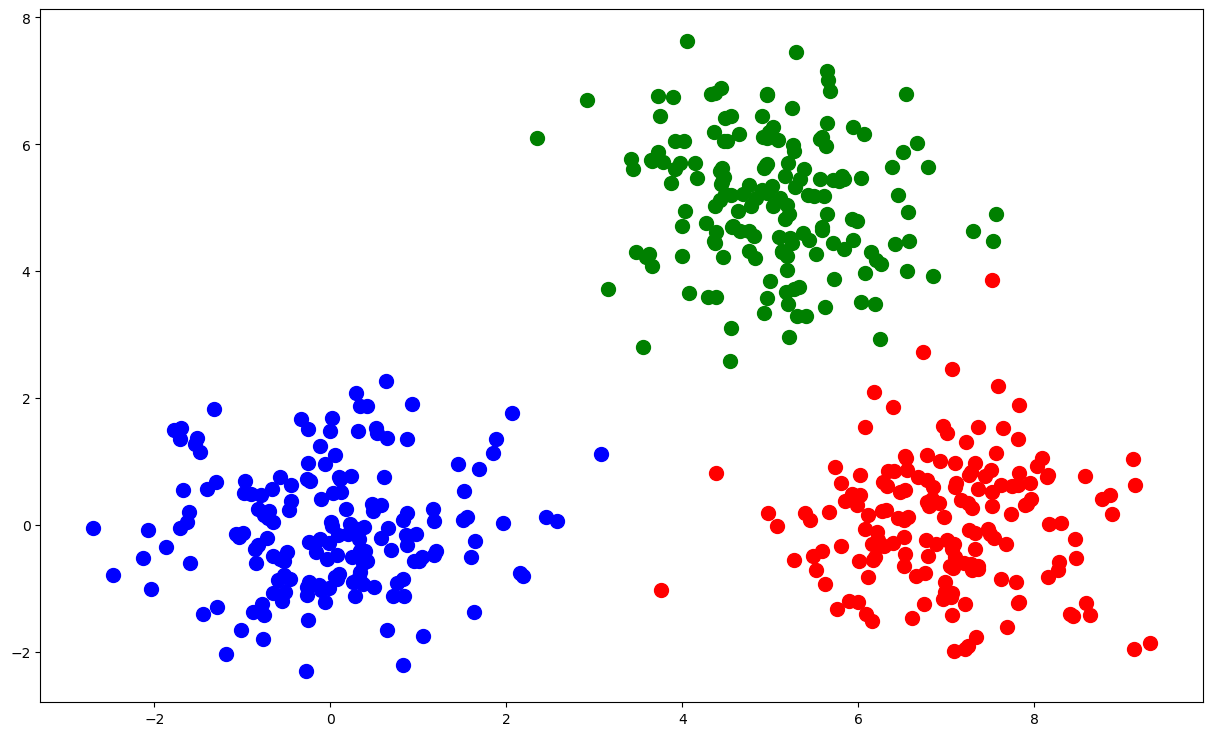

In [2]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

# import librarys
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random

# 生成数据
centers = [(7, 0), (0, 0), (5, 5)]
n_samples = 500

X, y = make_blobs(n_samples=n_samples, n_features=2, 
                  cluster_std=1.0, centers=centers, 
                  shuffle=True, random_state=42)

# 画出数据
plt.figure(figsize=(15, 9))

marksamples = ['or', 'ob', 'og', 'ok', '^r', '^b', '<g']  # 样本图形标记
for i in range(len(X)):
    markindex = y[i]
    plt.plot(X[i, 0], X[i, 1], marksamples[markindex], markersize=10)
       
plt.savefig("fig-res-k-means_data.pdf")
plt.show()


In [3]:
# k-means

def calc_distance(v1, v2):
    """
    计算两个样本的特征距离
    
    v1 - 样本1的特征向量
    v2 - 样本2的特征向量
    """
    return np.sum(np.square(v1-v2))

def rand_cluster_cents(X, k):
    """
    初始化聚类中心：通过在区间范围随机产生的值作为新的中心点
    
    X - 样本数据 （n x D）
    k - 聚类个数
    """

    # 样本数
    n=np.shape(X)[0]
    
    # 生成随机下标列表
    dataIndex=list(range(n))
    random.shuffle(dataIndex)
    centroidsIndex = dataIndex[:k]
    
    # 返回随机的聚类中心
    return X[centroidsIndex, :]

def kmeans(X, k):
    """
    kMeans算法
    
    X - 样本数据 （n x D）
    k - 聚类个数
    """
    # 样本总数
    n = np.shape(X)[0]
    
    # 分配样本到最近的簇：存[簇序号,距离的平方] (n行 x 2列)
    clusterAssment = np.zeros((n, 2))

    # step1: 通过随机产生的样本点初始化聚类中心
    centroids = rand_cluster_cents(X, k)
    print('最初的中心=', centroids)

    iterN = 0
    
    while True:   
        clusterChanged = False
    
        # step2:分配到最近的聚类中心对应的簇中
        for i in range(n):
            minDist = np.inf;
            minIndex = -1
            for j in range(k):
                # 计算第i个样本到第j个中心点的距离
                distJI = calc_distance(centroids[j, :], X[i, :])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
                    
            # 样本上次分配结果跟本次不一样，标志位clusterChanged置True
            if clusterAssment[i, 0] != minIndex:
                clusterChanged = True
            clusterAssment[i, :] = minIndex, minDist ** 2  # 分配样本到最近的簇
            
        iterN += 1
        sse = sum(clusterAssment[:, 1])
        print('the SSE of %d' % iterN + 'th iteration is %f' % sse)
        
        # step3:更新聚类中心
        for cent in range(k):  # 样本分配结束后，重新计算聚类中心
            ptsInClust = X[clusterAssment[:, 0] == cent, :]
            centroids[cent, :] = np.mean(ptsInClust, axis=0)
        
        # 如果聚类重心没有发生改变，则退出迭代
        if not clusterChanged:
            break
            
    return centroids, clusterAssment


In [4]:
# 进行k-means聚类
k = 3  # 用户定义聚类数
mycentroids, clusterAssment = kmeans(X, k)

最初的中心= [[ 7.49671415 -0.1382643 ]
 [-0.7737892  -1.2446547 ]
 [ 3.7196956   5.87245733]]
the SSE of 1th iteration is 11487.786963
the SSE of 2th iteration is 3510.264503
the SSE of 3th iteration is 3502.239035


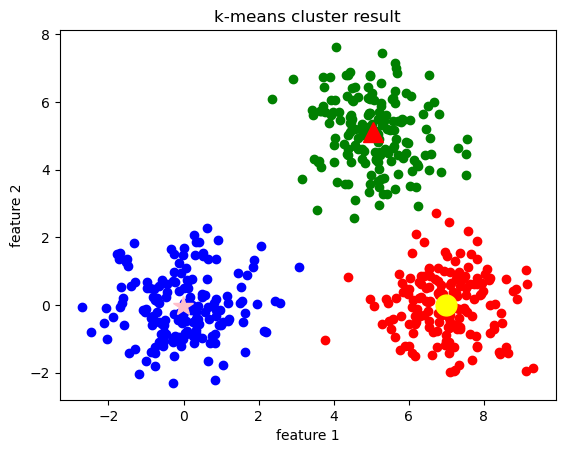

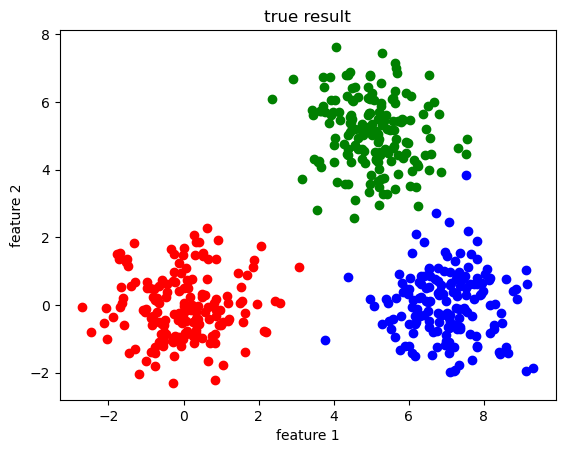

In [5]:
def datashow(dataSet, k, centroids, clusterAssment, fnFig=None):  # 二维空间显示聚类结果
    from matplotlib import pyplot as plt
    num, dim = np.shape(dataSet)  # 样本数num ,维数dim

    if dim != 2:
        print('sorry,the dimension of your dataset is not 2!')
        return 1
    marksamples = ['or', 'ob', 'og', 'ok', '^r', '^b', '<g']  # 样本图形标记
    if k > len(marksamples):
        print('sorry,your k is too large,please add length of the marksample!')
        return 1
        # 绘所有样本
    for i in range(num):
        markindex = int(clusterAssment[i, 0])  # 矩阵形式转为int值, 簇序号
        # 特征维对应坐标轴x,y；样本图形标记及大小
        plt.plot(dataSet[i, 0], dataSet[i, 1], marksamples[markindex], markersize=6)

    # 绘中心点
    markcentroids = ['o', '*', '^']  # 聚类中心图形标记
    label = ['0', '1', '2']
    c = ['yellow', 'pink', 'red']
    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], markcentroids[i], markersize=15, label=label[i], c=c[i])
        #plt.legend(loc='upper left')  #图例
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')

    plt.title('k-means cluster result')  # 标题
    if fnFig != None: plt.savefig(fnFig)
    plt.show()
    
    
# 画出实际图像
def trgartshow(dataSet, k, labels, fnFig=None):
    from matplotlib import pyplot as plt

    num, dim = np.shape(dataSet)
    label = ['0', '1', '2']
    marksamples = ['ob', 'or', 'og', 'ok', '^r', '^b', '<g']
    # 通过循环的方式，完成分组散点图的绘制
    for i in range(num):
        plt.plot(dataSet[i, 0], dataSet[i, 1], marksamples[int(labels[i])], markersize=6)

    
    # 添加轴标签和标题
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('true result')  # 标题

    # 显示图形
    if fnFig != None: plt.savefig(fnFig)
    plt.show()
    # label=labels.iat[i,0]
    
# 绘图显示
datashow(X, k, mycentroids, clusterAssment, "fig-res-k-means_predict.pdf")
trgartshow(X, 3, y, "fig-res-k-means_groundtruth.pdf")

## 5. 利用sklearn进行聚类


<Figure size 640x480 with 0 Axes>

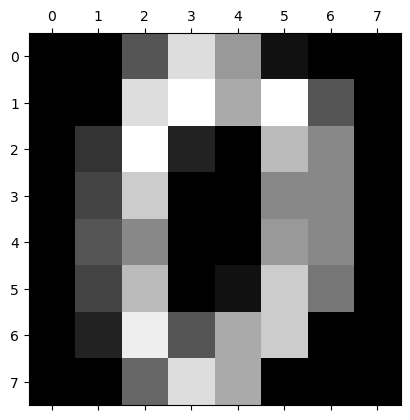

In [6]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

# load digital data
digits, dig_label = load_digits(return_X_y=True)

# draw one digital
plt.gray() 
plt.matshow(digits[0].reshape([8, 8])) 
plt.show() 

# calculate train/test data number
N = len(digits)
N_train = int(N*0.8)
N_test = N - N_train

# split train/test data
x_train = digits[:N_train, :]
y_train = dig_label[:N_train]
x_test  = digits[N_train:, :]
y_test  = dig_label[N_train:]



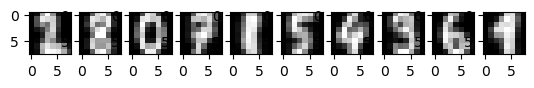

In [7]:
# do kmeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(x_train)

# kmeans.labels_ - output label
# kmeans.cluster_centers_ - cluster centers

# draw cluster centers
fig, axes = plt.subplots(nrows=1, ncols=10)
for i in range(10):
    img = kmeans.cluster_centers_[i].reshape(8, 8)
    axes[i].imshow(img)
plt.show()

## 6. 深入思考

1. 如何计算聚类的精度？
2. 如何匹配聚类的类别和真实类别？


## 7. 评估聚类性能

### 7.1 方法1 - ARI

如果被用来评估的数据本身带有正确的类别信息，则利用Adjusted Rand Index(ARI)对聚类结果进行评估，ARI与分类问题中计算准确性的方法类似，兼顾了类簇无法和分类标记一一对应的问题。



In [16]:
from sklearn.metrics import adjusted_rand_score

ari_train = adjusted_rand_score(y_train, kmeans.labels_)
print("ari_train = %f" % ari_train)

ari_train = 0.668967


#### 7.1.1 RI
为了方便理解ARI，先讨论一下RI，也就是rand index，是ARI的基础方法。

假如有两类，那么针对这两类的的RI评价指标为：

$$
R = \frac{a + b}{a+b+c+d}
$$

a,b,c,d分别代表的含义为:
* a : 应该在一类，最后聚类到一类的数量，
* b : 不应该在一类，最后聚类结果也没把他们聚类在一起的数量。
* c和d那么就是应该在一起而被分开的和不应该在一起而被迫在一起的。毕竟强扭的瓜不甜，c和d固然是错误的。

所以从R的表达式中可以看出，a和b是对的，这样能够保证R在0到1之间，而且，聚类越准确，指标越接近于1.

这里有一个关键性的问题，就是什么叫数量？怎么去计算？准确的说，是配对的数量。比如说a是应该在一起而真的幸福的在一起了的数量，这显然就应该像人类一样按照小夫妻数量计算，但是我们的样本可不管一夫一妻制，任意选两个就是一个配对，所以，就是 $n(n-1)/2$ 这样来计算，也就是组合数，n个当中选两个的选法。同时我们看到，分母其实是所有配对的总和，所以，我们最后可以写成这样：

$$
R = \frac{a + b}{a+b+c+d} = \frac{a + b}{\binom{n}{2}}
$$

#### 7.1.2 ARI

有了先前RI的感性理解之后，接下来解释一下ARI。

RI有一个缺点，就是惩罚力度不够，换句话说，大家普遍得分比较高，没什么区分度，普遍80分以上。这样的话，往往是评价区分性不是特别好，于是就诞生出了ARI，这个指标相对于RI就很有区分度了。

$$
ARI = \frac{Index - ExpctedIndex}{MaxIndex - ExpectedIndex}
$$

具体的公式是：
$$
ARI = \frac{ \sum_{ij} \binom{n_{ij}}{2} - \left[ \sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2} \right] / \binom{n}{2} }{ \frac{1}{2} \left[ \sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2} \right] - \left[ \sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2} \right] / \binom{n}{2} }
$$

ARI取值范围为[-1,1]，值越大越好，反映两种划分的重叠程度，使用该度量指标需要数据本身有类别标记。

关联表(contingency table)的定义:

![ARI_ct](images/ARI_ct.png)

表中：
* 其中$X$为真实类别，$Y$为聚类的簇
* $a_1$, ..., $a_r$ 是真实类别的数量
* $b_1$, ..., $b_s$ 是聚类的数量

公式中：
* $ \sum_{ij} \binom{n_{ij}}{2}$ :  $n_{ij}$代表的是聚类之后在$i$类，应该在$j$类的样本数量，很显然，这一求和，就是RI中的a,应该在一起而真的在一起的数量。

* $\frac{1}{2} \left[ \sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2} \right]$ : 是如果聚类是完全对的，那么就应该是$a$, $b$的所有组合可能之和，所以在表达式里面叫做MaxIndex。

* $\left[ \sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2} \right] / \binom{n}{2}$ 是a的期望
$$
E(\sum_{ij} \binom{n_{ij}}{2}) = \sum_i \binom{n_i}{2} \sum_j \binom{n_j}{2}  / \binom{n}{2}
$$

假设配对矩阵是这样的，共有 $n(n-1)/2$ 个配对方法。在行方向计算出可能取到的配对数，在列方向计算可能取到的配对数，相乘以后，除以总的配对数，这就是a的期望了。



* [ARI聚类效果评价指标](https://blog.csdn.net/qtlyx/article/details/52678895)
* [ARI reference](https://davetang.org/muse/2017/09/21/adjusted-rand-index/)
* [聚类性能评估-ARI（调兰德指数）](https://zhuanlan.zhihu.com/p/145856959)



### 7.2 方法2 - 轮廓系数
如果被用来评估的数据没有所属类别，则使用轮廓系数(Silhouette Coefficient)来度量聚类结果的质量，评估聚类的效果。**轮廓系数同时兼顾了聚类的凝聚度和分离度，取值范围是[-1,1]，轮廓系数越大，表示聚类效果越好。** 

轮廓系数的具体计算步骤： 
1. 对于已聚类数据中第i个样本$x_i$，计算$x_i$与其同一类簇内的所有其他样本距离的平均值，记作$a_i$，用于量化簇内的凝聚度 
2. 选取$x_i$外的一个簇$b$，计算$x_i$与簇$b$中所有样本的平均距离，遍历所有其他簇，找到最近的这个平均距离，记作$b_i$，用于量化簇之间分离度 
3. 对于样本$x_i$，轮廓系数为$sc_i = \frac{b_i−a_i}{max(b_i,a_i)}$ 
4. 最后，对所有样本集合$\mathbf{X}$求出平均值，即为当前聚类结果的整体轮廓系数。

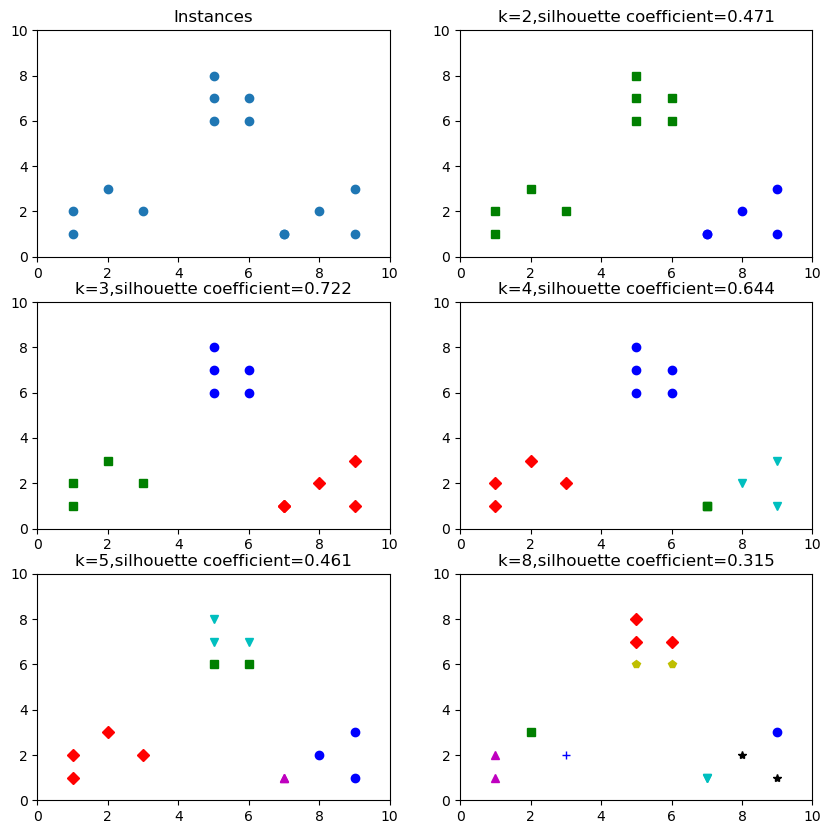

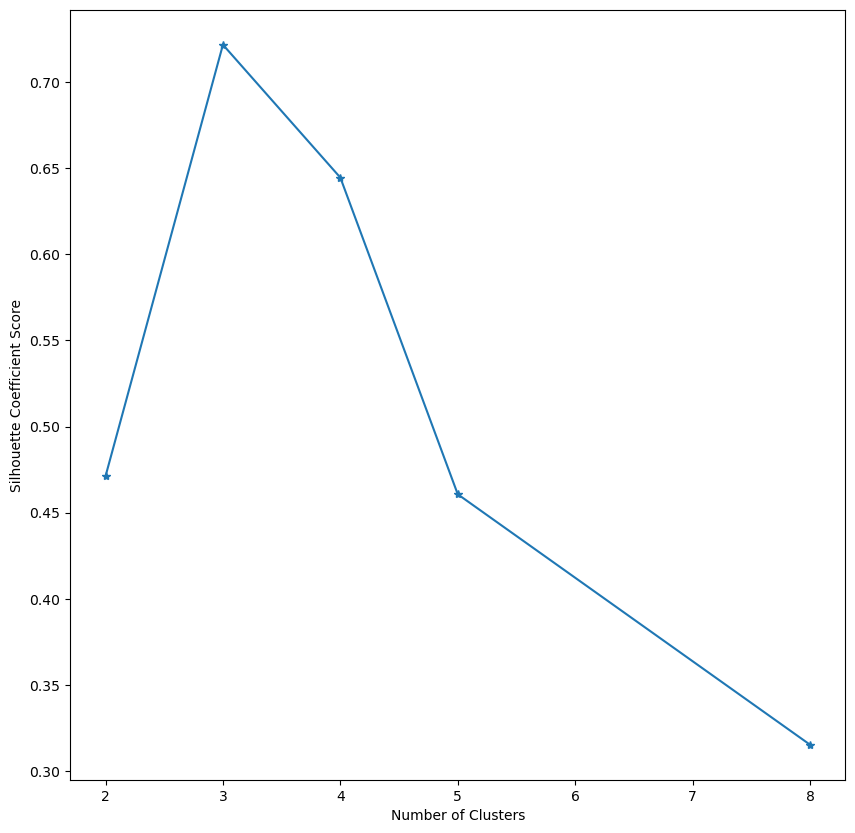

In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(10,10)
plt.subplot(3,2,1)

x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])   #初始化原始数据
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)

plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)

colors=['b','g','r','c','m','y','k','b']
markers=['o','s','D','v','^','p','*','+']

clusters=[2,3,4,5,8]
subplot_counter=1
sc_scores=[]
for t in clusters:
    subplot_counter +=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t).fit(X)   #KMeans建模

    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls='None')

    plt.xlim([0,10])
    plt.ylim([0,10])

    sc_score=silhouette_score(X,kmeans_model.labels_,metric='euclidean')   #计算轮廓系数
    sc_scores.append(sc_score)

    plt.title('k=%s,silhouette coefficient=%0.03f'%(t,sc_score))

plt.figure()
plt.plot(clusters,sc_scores,'*-')   #绘制类簇数量与对应轮廓系数关系
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.savefig('fig-res-k-means_silhouette_coef.pdf')
plt.show()   

## 8. 如何确定K

利用“肘部观察法”可以粗略地估计相对合理的聚类个数。K-means模型最终期望*所有数据点到其所属的类簇距离的平方和趋于稳定，所以可以通过观察这个值随着K的走势来找出最佳的类簇数量。理想条件下，这个折线在不断下降并且趋于平缓的过程中会有斜率的拐点，这表示从这个拐点对应的K值开始，类簇中心的增加不会过于破坏数据聚类的结构*。



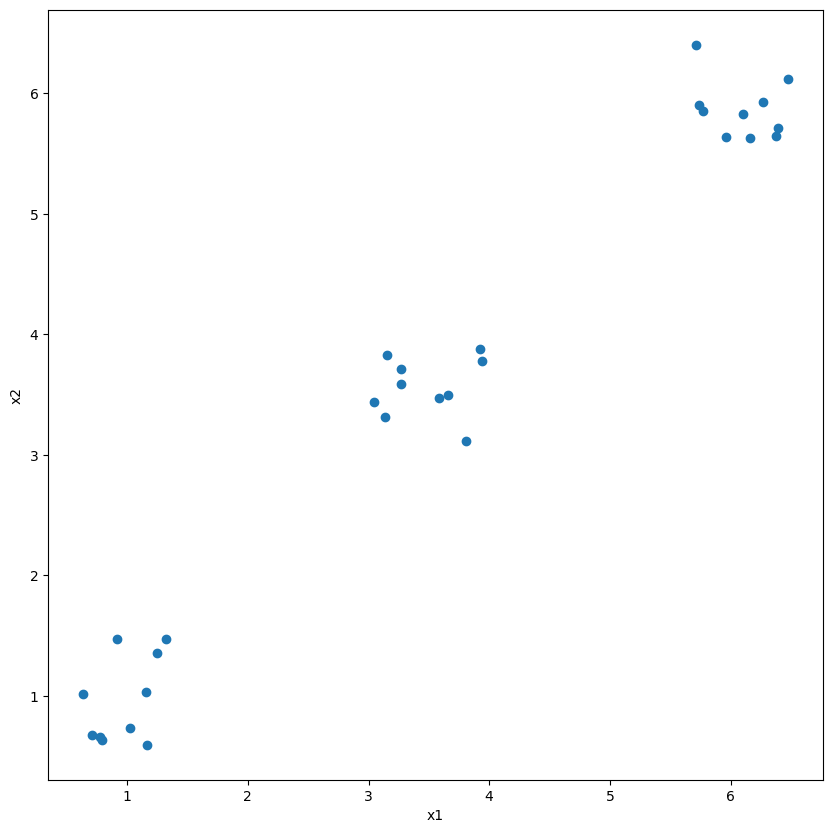

In [19]:
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1=np.random.uniform(0.5,1.5,(2,10))
cluster2=np.random.uniform(5.5,6.5,(2,10))
cluster3=np.random.uniform(3,4,(2,10))

X=np.hstack((cluster1,cluster2,cluster3)).T
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

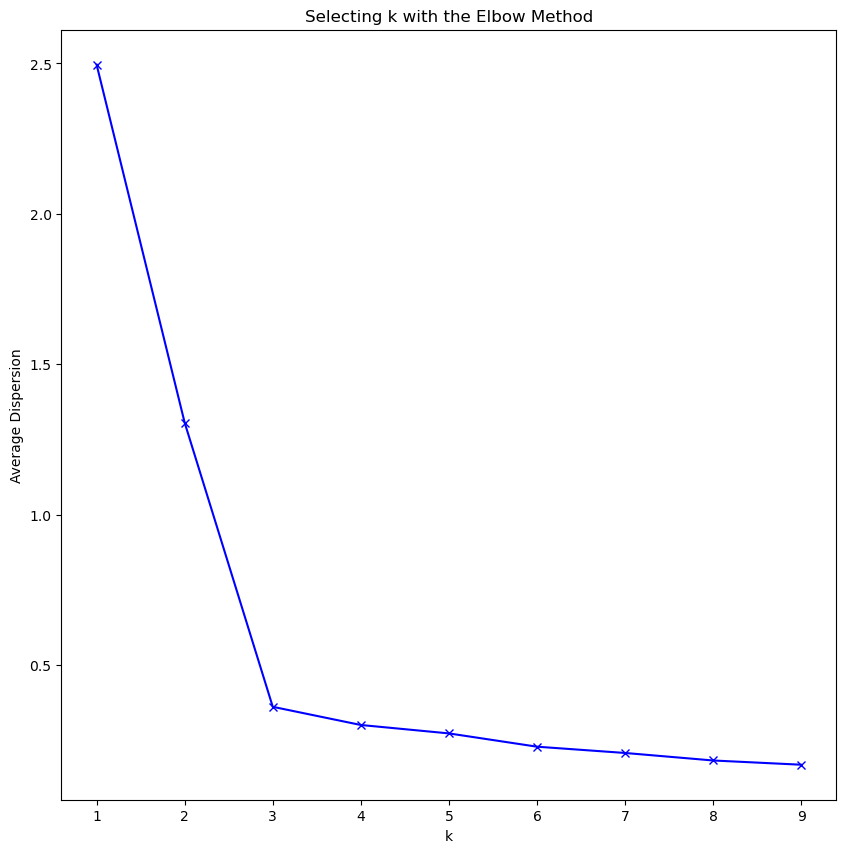

In [20]:
K=range(1,10)
meandistortions=[]

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(\
        sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

从上图可见，类簇数量从1降到2再降到3的过程，更改K值让整体聚类结构有很大改变，这意味着新的聚类数量让算法有更大的收敛空间，这样的K值不能反映真实的类簇数量。而当K=3以后再增大K，平均距离的下降速度显著变缓慢，这意味着进一步增加K值不再会有利于算法的收敛，同时也暗示着K=3是相对最佳的类簇数量。

## 参考资料
* [机器学习聚类算法之K-Means](https://www.biaodianfu.com/k-means.html)